Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Zoe(Xiaoao) Xu"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
conda install quandl


Solving environment: ...working... 
  - defaults::openssl-1.1.1c-he774522_1
  - anaconda::openssl-1.1.1c-he774522_1done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
import quandl
quandl.ApiConfig.api_key = "iaiBotWeQxFfKwx5xTBo"

In [4]:
conda install -c ranaroussi yfinance

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\zoe.xu\Documents

  added / updated specs:
    - yfinance


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yfinance-0.1.50            |             py_0         646 KB  ranaroussi
    ------------------------------------------------------------
                                           Total:         646 KB

The following NEW packages will be INSTALLED:

  multitasking       ranaroussi/noarch::multitasking-0.0.9-py_0
  yfinance           ranaroussi/noarch::yfinance-0.1.50-py_0




yfinance-0.1.50      | 646 KB    |            |   0% 
yfinance-0.1.50      | 646 KB    | 2          |   2% 
yfinance-0.1.50      | 646 KB    | 7          |   7% 
yfinance-0.1.50      | 646 KB    | #9         |  20% 
yfinance-0.1.50      | 646 KB    | ####2      |  42% 
yfinance-0.1.50      | 646 KB    | ######1    | 


InvalidArchiveError('Error with archive C:\\Users\\zoe.xu\\Documents\\pkgs\\yfinance-0.1.50-py_0.tar.bz2.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink (errno=22, retcode=-25, archive_p=2544049881584)')



In [5]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

import yfinance as yf

#where `start` and `end` you can specify before this line of code as separate attributes, or you can specify them explicitly:

data = yf.download("AMZN", start='2014-11-01', end='2019-11-01')

[*********************100%***********************]  1 of 1 completed


### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [6]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\users\zoe.xu\documents\lib\site-packages (0.1.50)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start='2014-11-01', end='2019-11-01')


[*********************100%***********************]  1 of 1 completed


In [8]:
# 2) Using fix_yahoo_finance library only to download AMZN data

#amzn = yf.download('AMZN', start=start)

In [9]:
# If we want to download multipe stocks into a single dataframe:


In [10]:
## TYPE YOUE CODE BELOW
#(2 points) Download the adjusted close prices for FB, MMM, IBM and AMZN 
#for the last 60 months. If you run into any issues downloading the data from online sources,
#you can use .csv files provided. This will not affect your grade for the assignment.
all_stocks_list = ['AMZN']
all_stocks = yf.download(all_stocks_list, start='2014-11-01', end='2019-11-01')


[*********************100%***********************]  1 of 1 completed


In [11]:
all_stocks.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-03,306.239990,308.010010,303.239990,305.720001,305.720001,3242500
2014-11-04,303.989990,304.250000,300.170013,302.809998,302.809998,3427400
2014-11-05,303.010010,304.000000,294.160004,296.519989,296.519989,4674500
2014-11-06,296.690002,297.000000,292.290009,296.640015,296.640015,3758100
2014-11-07,297.820007,299.989990,296.290009,299.859985,299.859985,2647400
2014-11-10,300.000000,305.799988,300.000000,305.109985,305.109985,2809100
2014-11-11,305.940002,312.380005,303.649994,312.010010,312.010010,3803600
2014-11-12,310.750000,312.579987,308.790009,311.510010,311.510010,2183000
2014-11-13,312.000000,317.890015,311.510010,316.480011,316.480011,3686400


In [12]:
#3.(3 points) Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.
amzn_stocks=all_stocks
amzn_stocks.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-03,306.239990,308.010010,303.239990,305.720001,305.720001,3242500
2014-11-04,303.989990,304.250000,300.170013,302.809998,302.809998,3427400
2014-11-05,303.010010,304.000000,294.160004,296.519989,296.519989,4674500
2014-11-06,296.690002,297.000000,292.290009,296.640015,296.640015,3758100
2014-11-07,297.820007,299.989990,296.290009,299.859985,299.859985,2647400
2014-11-10,300.000000,305.799988,300.000000,305.109985,305.109985,2809100
2014-11-11,305.940002,312.380005,303.649994,312.010010,312.010010,3803600
2014-11-12,310.750000,312.579987,308.790009,311.510010,311.510010,2183000
2014-11-13,312.000000,317.890015,311.510010,316.480011,316.480011,3686400


In [13]:
amzn_stocks.index

DatetimeIndex(['2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06',
               '2014-11-07', '2014-11-10', '2014-11-11', '2014-11-12',
               '2014-11-13', '2014-11-14',
               ...
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-28', '2019-10-29', '2019-10-30',
               '2019-10-31', '2019-11-01'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [14]:

amzn_stocks_series=pd.Series(list(amzn_stocks['Adj Close']),index=pd.to_datetime(amzn_stocks.index))
amzn_stocks_series.head(10)


Date
2014-11-03    305.720001
2014-11-04    302.809998
2014-11-05    296.519989
2014-11-06    296.640015
2014-11-07    299.859985
2014-11-10    305.109985
2014-11-11    312.010010
2014-11-12    311.510010
2014-11-13    316.480011
2014-11-14    327.820007
dtype: float64

In [15]:
#Get the prices for the end of the business month
# "original":amzn_stocks_series,
    #"resampled"
    
amzn_stocks_series_m=amzn_stocks_series.resample("M").mean()
amzn_stocks_series_m.head(10)


Date
2014-11-30    318.687372
2014-12-31    308.786819
2015-01-31    302.747501
2015-02-28    375.745263
2015-03-31    375.321361
2015-04-30    394.212857
2015-05-31    426.927501
2015-06-30    432.599548
2015-07-31    478.709095
2015-08-31    518.464765
Freq: M, dtype: float64

In [16]:
#4.(3 points) Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
#•Are they autocorrelated?
#•Provide short explanation.



In [17]:
"""
Actual calculation of correlation for each lag value.
Looking at the prior graph, we can affirm that the observed series is white noise.
"""
amzn_TimePlot = pd.plotting.autocorrelation_plot(amzn_stocks_series_m)
amzn_TimePlot.set_title("AMZN Autocorrelation Graph of Month End Price")
amzn_TimePlot.set_ylabel("Correlation")
amzn_TimePlot.set_xlabel("Lag (Month)")
None

In [18]:
# all the data point are autocorrelated becuase more of the coeffcientcy is not zero. 
# We can test the series to find further patterns. 

In [19]:
#5.(4 points) 
#•Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function. 
#•Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.
#•Are the returns autocorrelated? Provide short explanation.



In [20]:
# With shift(), shift time series and calculate the 
amzn_return=amzn_stocks_series_m / amzn_stocks_series_m.shift(1)-1
amzn_return.head(10)


Date
2014-11-30         NaN
2014-12-31   -0.031067
2015-01-31   -0.019558
2015-02-28    0.241118
2015-03-31   -0.001128
2015-04-30    0.050334
2015-05-31    0.082987
2015-06-30    0.013286
2015-07-31    0.106587
2015-08-31    0.083048
Freq: M, dtype: float64

In [21]:
#There is/are NaN in the series. 
#Try to fill backwards using method= 'ffill'
amzn_return_adj=amzn_return.asfreq(freq='M', method='ffill')
pd.isna(amzn_return_adj).head(10)

Date
2014-11-30     True
2014-12-31    False
2015-01-31    False
2015-02-28    False
2015-03-31    False
2015-04-30    False
2015-05-31    False
2015-06-30    False
2015-07-31    False
2015-08-31    False
Freq: M, dtype: bool

In [22]:
#There is/are NaN in the series. 
#Try to fill NaN at 2014-11-30 with zero
amzn_return_adj=amzn_return.fillna(0)
pd.isna(amzn_return_adj).head(10)

Date
2014-11-30    False
2014-12-31    False
2015-01-31    False
2015-02-28    False
2015-03-31    False
2015-04-30    False
2015-05-31    False
2015-06-30    False
2015-07-31    False
2015-08-31    False
Freq: M, dtype: bool

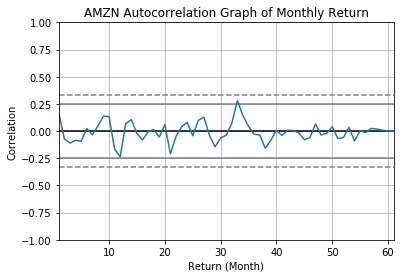

In [23]:
#test the correlation of the monthly return. 
amzn_return_TimePlot = pd.plotting.autocorrelation_plot(amzn_return_adj)
amzn_return_TimePlot.set_title("AMZN Autocorrelation Graph of Monthly Return")
amzn_return_TimePlot.set_ylabel("Correlation")
amzn_return_TimePlot.set_xlabel("Return (Month)")
None

In [24]:
# the returns are correlated. the correlation is not storng as it is between -0.25 to 0.25

[*********************100%***********************]  1 of 1 completed


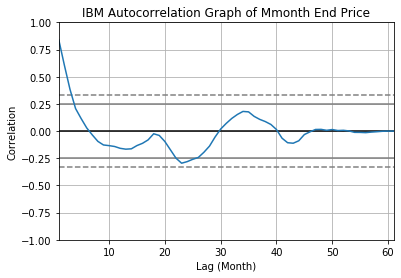

In [25]:
#6.(3 points)
#•Combine all 4 time series (returns) into a single DataFrame,


ibm_stocks_list = ['IBM']
ibm_stocks = yf.download(ibm_stocks_list, start='2014-11-01', end='2019-11-01')
ibm_stocks_series=pd.Series(list(ibm_stocks['Adj Close']),index=pd.to_datetime(ibm_stocks.index))
ibm_stocks_series_m=ibm_stocks_series.resample("M").mean()
ibm_TimePlot = pd.plotting.autocorrelation_plot(ibm_stocks_series_m)
ibm_TimePlot.set_title("IBM Autocorrelation Graph of Mmonth End Price")
ibm_TimePlot.set_ylabel("Correlation")
ibm_TimePlot.set_xlabel("Lag (Month)")
None

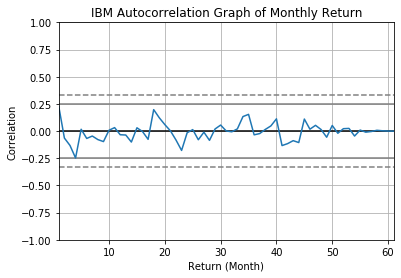

In [26]:
ibm_return=ibm_stocks_series_m / ibm_stocks_series_m.shift(1)-1
ibm_return_adj=ibm_return.fillna(0)
ibm_return_TimePlot = pd.plotting.autocorrelation_plot(ibm_return_adj)
ibm_return_TimePlot.set_title("IBM Autocorrelation Graph of Monthly Return")
ibm_return_TimePlot.set_ylabel("Correlation")
ibm_return_TimePlot.set_xlabel("Return (Month)")
None

[*********************100%***********************]  1 of 1 completed


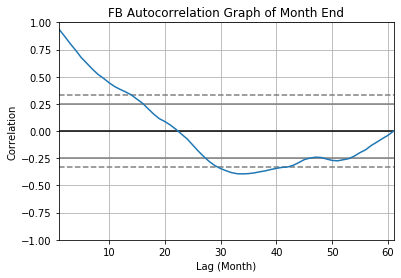

In [27]:
fb_stocks_list = ['FB']
fb_stocks = yf.download(fb_stocks_list, start='2014-11-01', end='2019-11-01')
fb_stocks_series=pd.Series(list(fb_stocks['Adj Close']),index=pd.to_datetime(fb_stocks.index))
fb_stocks_series_m=fb_stocks_series.resample("M").mean()
fb_TimePlot = pd.plotting.autocorrelation_plot(fb_stocks_series_m)
fb_TimePlot.set_title("FB Autocorrelation Graph of Month End")
fb_TimePlot.set_ylabel("Correlation")
fb_TimePlot.set_xlabel("Lag (Month)")
None

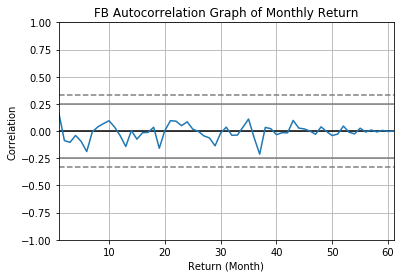

In [28]:
fb_return=fb_stocks_series_m / fb_stocks_series_m.shift(1)-1
fb_return_adj=fb_return.fillna(0)
fb_return_TimePlot = pd.plotting.autocorrelation_plot(fb_return_adj)
fb_return_TimePlot.set_title("FB Autocorrelation Graph of Monthly Return")
fb_return_TimePlot.set_ylabel("Correlation")
fb_return_TimePlot.set_xlabel("Return (Month)")
None

[*********************100%***********************]  1 of 1 completed


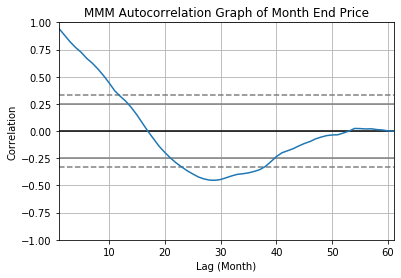

In [29]:
mmm_stocks_list = ['MMM']
mmm_stocks = yf.download(mmm_stocks_list, start='2014-11-01', end='2019-11-01')
mmm_stocks_series=pd.Series(list(mmm_stocks['Adj Close']),index=pd.to_datetime(mmm_stocks.index))
mmm_stocks_series_m=mmm_stocks_series.resample("M").mean()
mmm_TimePlot = pd.plotting.autocorrelation_plot(mmm_stocks_series_m)
mmm_TimePlot.set_title("MMM Autocorrelation Graph of Month End Price")
mmm_TimePlot.set_ylabel("Correlation")
mmm_TimePlot.set_xlabel("Lag (Month)")
None

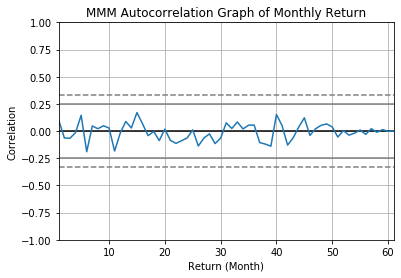

In [30]:
mmm_return=mmm_stocks_series_m / mmm_stocks_series_m.shift(1)-1
mmm_return_adj=mmm_return.fillna(0)
mmm_return_TimePlot = pd.plotting.autocorrelation_plot(mmm_return_adj)
mmm_return_TimePlot.set_title("MMM Autocorrelation Graph of Monthly Return")
mmm_return_TimePlot.set_ylabel("Correlation")
mmm_return_TimePlot.set_xlabel("Return (Month)")
None

In [31]:
#•Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).

mmm_return_df=pd.Series.to_frame(mmm_return_adj)
ibm_return_df=pd.Series.to_frame(ibm_return_adj)
fb_return_df=pd.Series.to_frame(fb_return_adj)
amzn_return_df=pd.Series.to_frame(amzn_return_adj)
df_return_m= pd.concat([mmm_return_df,ibm_return_df,fb_return_df,amzn_return_df],axis=1)


In [32]:

df_return_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2014-11-30 to 2019-11-30
Freq: M
Data columns (total 4 columns):
0    61 non-null float64
0    61 non-null float64
0    61 non-null float64
0    61 non-null float64
dtypes: float64(4)
memory usage: 4.9 KB


In [33]:
df_return_m.columns=['MMM','IBM','FB','AMZN']


In [34]:
df_return_m.head(10)

,MMM,IBM,FB,AMZN
Date,,,,
2014-11-30,0.000000,0.000000,0.000000,0.000000
2014-12-31,0.032211,-0.013752,0.037255,-0.031067
2015-01-31,-0.000884,-0.024288,-0.012408,-0.019558
2015-02-28,0.031968,0.030872,0.002992,0.241118
2015-03-31,-0.006773,0.000175,0.052788,-0.001128
2015-04-30,-0.013514,0.033841,0.013310,0.050334
2015-05-31,-0.013381,0.055756,-0.032542,0.082987
2015-06-30,-0.013355,-0.027050,0.048648,0.013286
2015-07-31,-0.023917,-0.014320,0.105319,0.106587


In [35]:
return_m_corr=pd.DataFrame.corr(df_return_m, method='pearson', min_periods=1)
return_m_corr

,MMM,IBM,FB,AMZN
MMM,1.000000,0.491482,0.299108,0.227944
IBM,0.491482,1.000000,0.258880,0.286920
FB,0.299108,0.258880,1.000000,0.385450
AMZN,0.227944,0.286920,0.385450,1.000000


In [36]:
#•Visualize the correlation between the returns of all pairs 
#of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting).


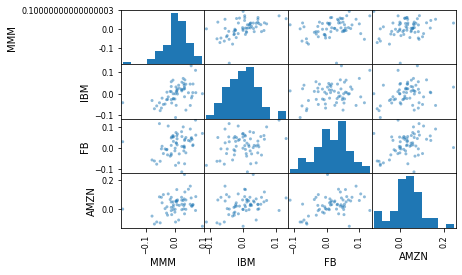

In [37]:
return_m_corr_plotting = pd.plotting.scatter_matrix(df_return_m,alpha=0.5)

In [38]:
#•Explain the results. Is there any correlation?
# In the 60 weeks timeframe, there is not clear correlation between these stocks
# becuase it , the dots, it all over the place in the graph. 
